# <center><b><u>The Spark Foundation</u></b></center>
## Task 6 : Timeline Analysis - Covid 19
### Timeline Analysis
In this task we will analyze the spread of Covid 19 cases.

### Name : Mansi Panchal   

#### Step 1 - Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Step 2 - Loading Datasets 

In [2]:
df = pd.read_csv('Covid Data.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


#### Step 3 - Describing Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51147 entries, 0 to 51146
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         50853 non-null  object 
 1   continent                        50559 non-null  object 
 2   location                         51147 non-null  object 
 3   date                             51147 non-null  object 
 4   total_cases                      47553 non-null  float64
 5   new_cases                        50281 non-null  float64
 6   new_cases_smoothed               49495 non-null  float64
 7   total_deaths                     38789 non-null  float64
 8   new_deaths                       50281 non-null  float64
 9   new_deaths_smoothed              49495 non-null  float64
 10  total_cases_per_million          47295 non-null  float64
 11  new_cases_per_million            50217 non-null  float64
 12  new_cases_smoothed

In [4]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,4.755300e+04,50281.000000,49495.000000,3.878900e+04,50281.000000,49495.000000,47295.000000,50217.000000,49430.000000,38546.000000,...,44964.000000,29986.000000,45551.000000,47188.000000,35588.000000,35133.000000,21427.000000,41090.000000,50205.000000,43960.000000
mean,1.318472e+05,1595.312265,1576.630315,6.026920e+03,44.336191,44.404981,2427.244083,28.802527,28.095796,83.940387,...,20785.870707,12.255746,251.953929,8.051821,10.781044,32.636481,52.278939,3.102475,73.985174,0.723746
std,1.320386e+06,14369.302512,14107.081477,4.877375e+04,370.634763,360.386558,4814.319832,102.128062,69.584198,168.186730,...,20379.717943,19.319783,117.425228,4.154297,10.474353,13.433793,31.629889,2.521130,7.385739,0.153038
min,1.000000e+00,-8261.000000,-552.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2212.545000,-269.978000,0.000000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,1.410000e+02,0.000000,0.714000,1.100000e+01,0.000000,0.000000,69.560000,0.000000,0.191000,3.299000,...,5338.454000,0.500000,155.898000,5.310000,1.900000,21.400000,21.222000,1.300000,69.870000,0.601000
50%,1.651000e+03,12.000000,17.000000,6.900000e+01,0.000000,0.286000,459.337000,1.802000,3.349000,17.051000,...,14048.881000,2.000000,238.339000,7.110000,6.400000,31.400000,52.232000,2.500000,75.400000,0.754000
75%,1.654800e+04,189.000000,196.429000,6.030000e+02,3.000000,3.429000,2673.945500,20.755000,23.392500,68.628500,...,31400.840000,18.100000,318.991000,10.390000,19.600000,40.900000,83.741000,4.200000,79.380000,0.847000
max,4.010696e+07,396737.000000,352319.857000,1.114636e+06,10434.000000,7448.429000,45782.075000,8652.658000,2472.188000,1237.551000,...,116935.600000,77.600000,724.417000,23.360000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


In [5]:
df.corr()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
total_cases,1.000000,0.948592,0.956170,0.975774,0.760291,0.789313,0.088560,0.033102,0.049264,0.088843,...,0.009685,-0.031794,-0.029770,0.016306,-0.011382,-0.013112,0.030343,-0.015950,0.006876,0.094273
new_cases,0.948592,1.000000,0.994073,0.965259,0.878653,0.892432,0.063646,0.049940,0.062726,0.065620,...,-0.001735,-0.027097,-0.029099,0.017753,-0.019283,-0.016495,0.032465,-0.022602,0.000924,0.073781
new_cases_smoothed,0.956170,0.994073,1.000000,0.971569,0.869123,0.897070,0.064939,0.043359,0.063470,0.067060,...,-0.002058,-0.026749,-0.029371,0.018235,-0.019934,-0.017193,0.032046,-0.023406,0.000387,0.073445
total_deaths,0.975774,0.965259,0.971569,1.000000,0.832616,0.864457,0.074351,0.032153,0.041566,0.121952,...,0.015167,-0.043460,-0.050538,0.016520,-0.002570,-0.014899,0.040201,-0.017925,0.021144,0.159870
new_deaths,0.760291,0.878653,0.869123,0.832616,1.000000,0.970264,0.042391,0.035070,0.048215,0.065809,...,0.001493,-0.037569,-0.043254,0.016013,-0.014799,-0.021373,0.039800,-0.024210,0.009163,0.100132
new_deaths_smoothed,0.789313,0.892432,0.897070,0.864457,0.970264,1.000000,0.044959,0.033017,0.049855,0.071623,...,0.001577,-0.038198,-0.044925,0.016527,-0.015101,-0.022426,0.040086,-0.025200,0.009267,0.109112
total_cases_per_million,0.088560,0.063646,0.064939,0.074351,0.042391,0.044959,1.000000,0.420693,0.623169,0.583213,...,0.384375,-0.239736,-0.200159,0.126400,0.090931,-0.047972,0.288004,0.012530,0.270354,0.271029
new_cases_per_million,0.033102,0.049940,0.043359,0.032153,0.035070,0.033017,0.420693,1.000000,0.700250,0.250267,...,0.200982,-0.184265,-0.128673,0.102771,0.096340,-0.015469,0.247871,0.015642,0.136041,0.181781
new_cases_smoothed_per_million,0.049264,0.062726,0.063470,0.041566,0.048215,0.049855,0.623169,0.700250,1.000000,0.319321,...,0.231458,-0.211287,-0.159533,0.129251,0.109224,-0.022740,0.291384,0.011133,0.192459,0.218286
total_deaths_per_million,0.088843,0.065620,0.067060,0.121952,0.065809,0.071623,0.583213,0.250267,0.319321,1.000000,...,0.286565,-0.254633,-0.309351,-0.072838,0.308146,-0.104954,0.260469,0.046741,0.339898,0.337263


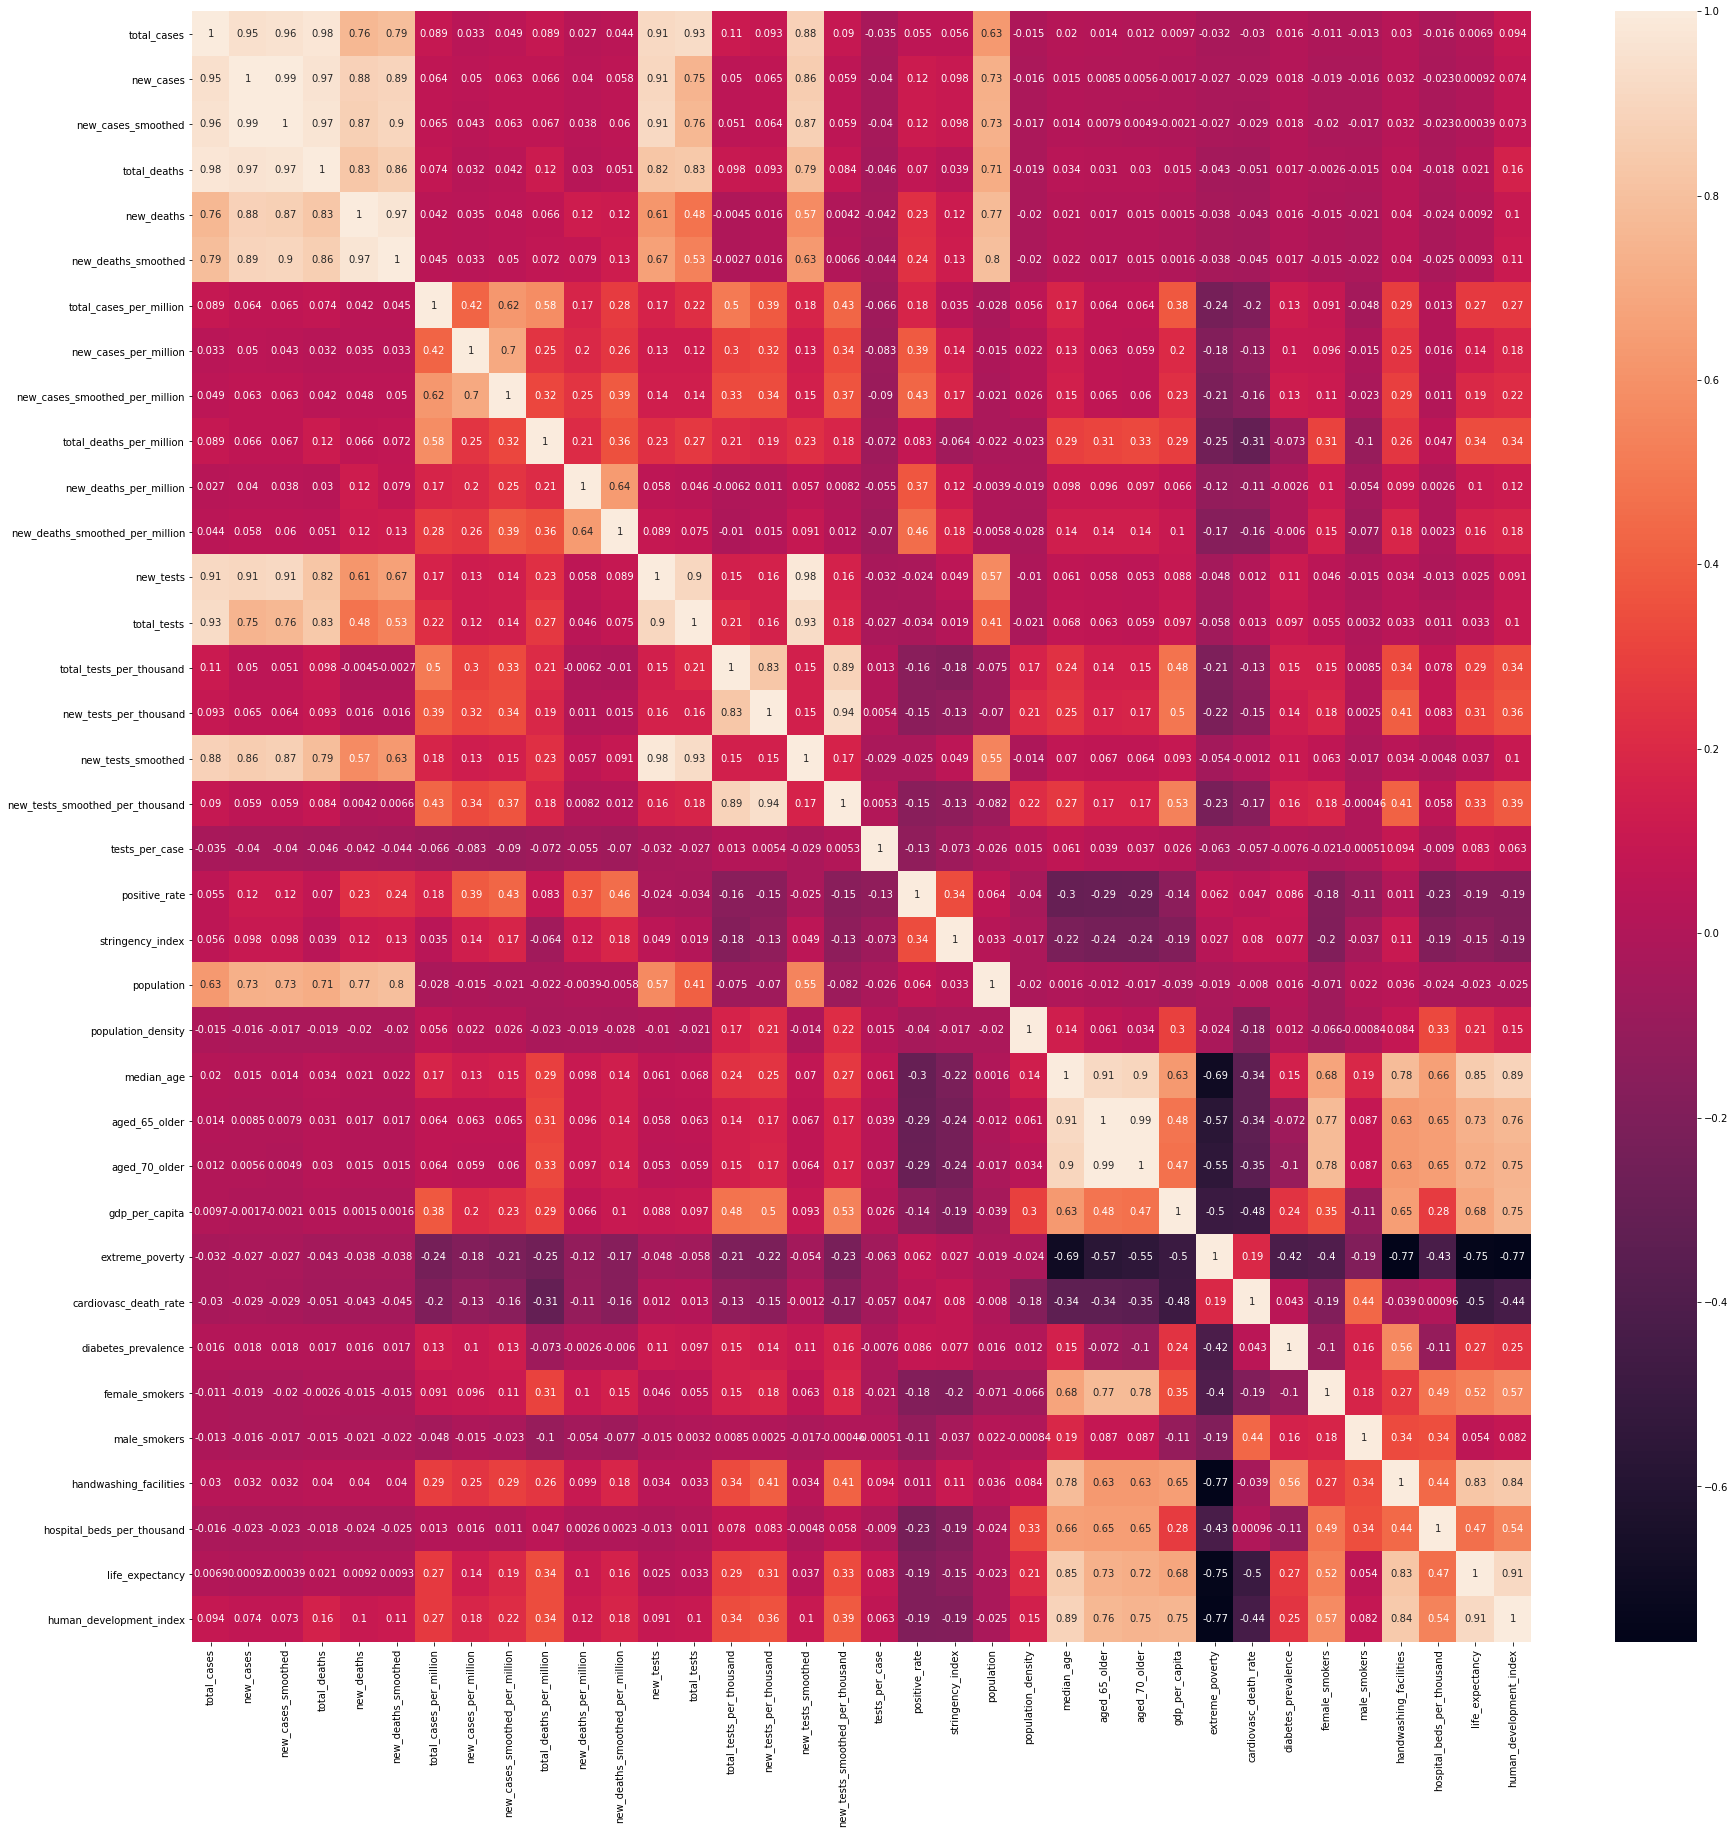

In [6]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot = True)
plt.show()

#### Step 4 - Data Visualization

In [7]:
ndf = df[['date','continent','location','population','total_cases','new_cases','total_deaths','new_deaths','total_tests','new_tests']]

Text(0.5, 0, 'Month')

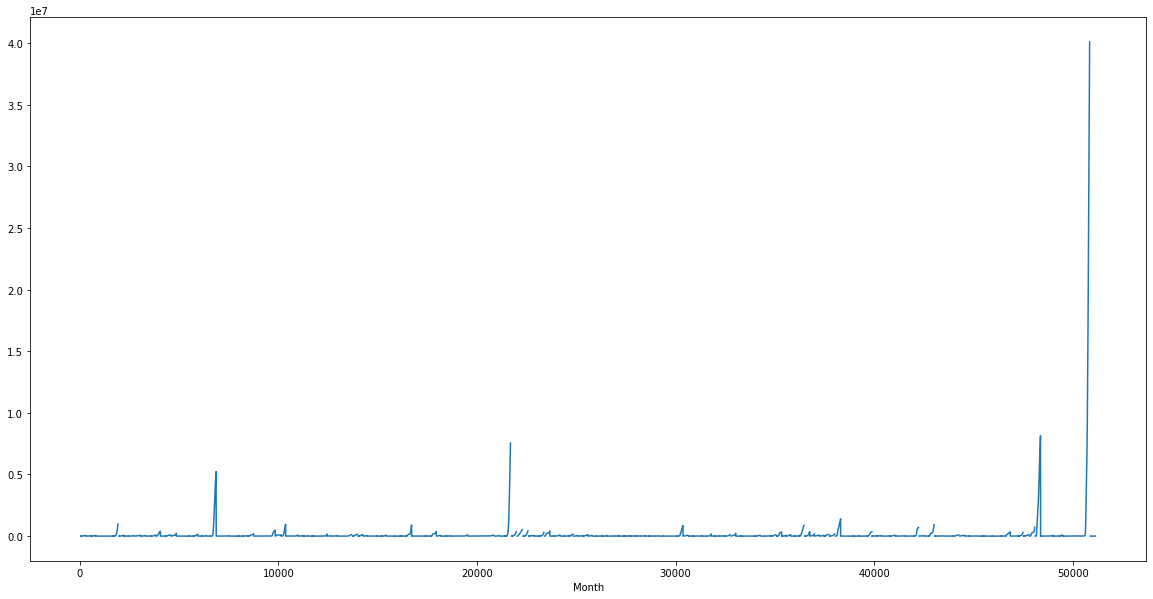

In [8]:
ndf.total_cases.plot(figsize=(20,10))
plt.xlabel("Month")

Text(0.5, 0, 'Month')

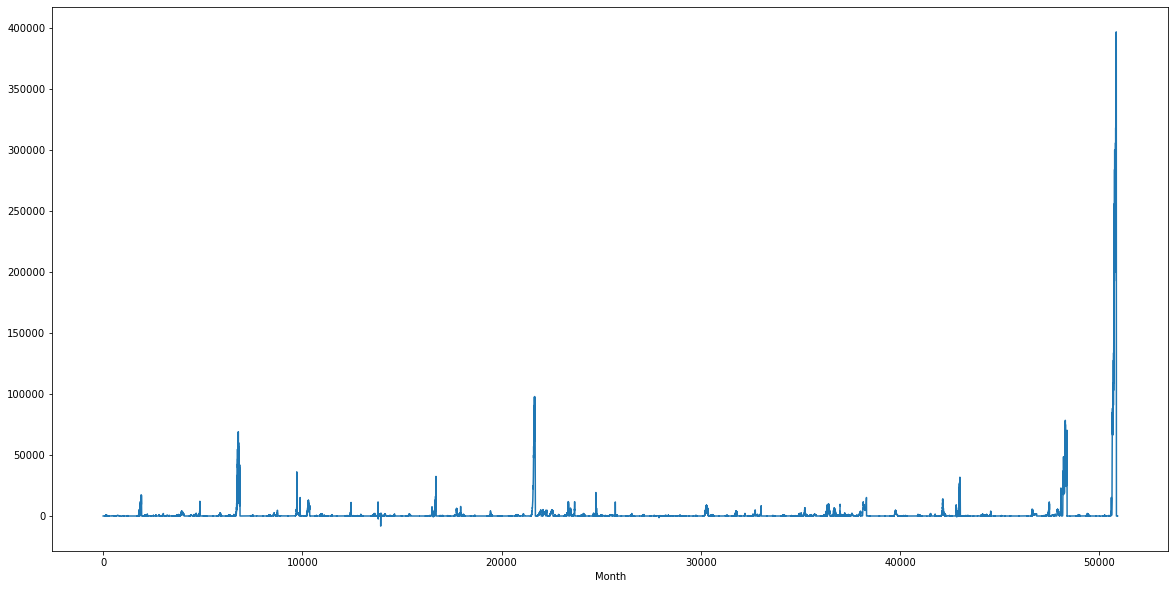

In [9]:
ndf.new_cases.plot(figsize=(20,10))
plt.xlabel("Month")

Text(0.5, 0, 'Month')

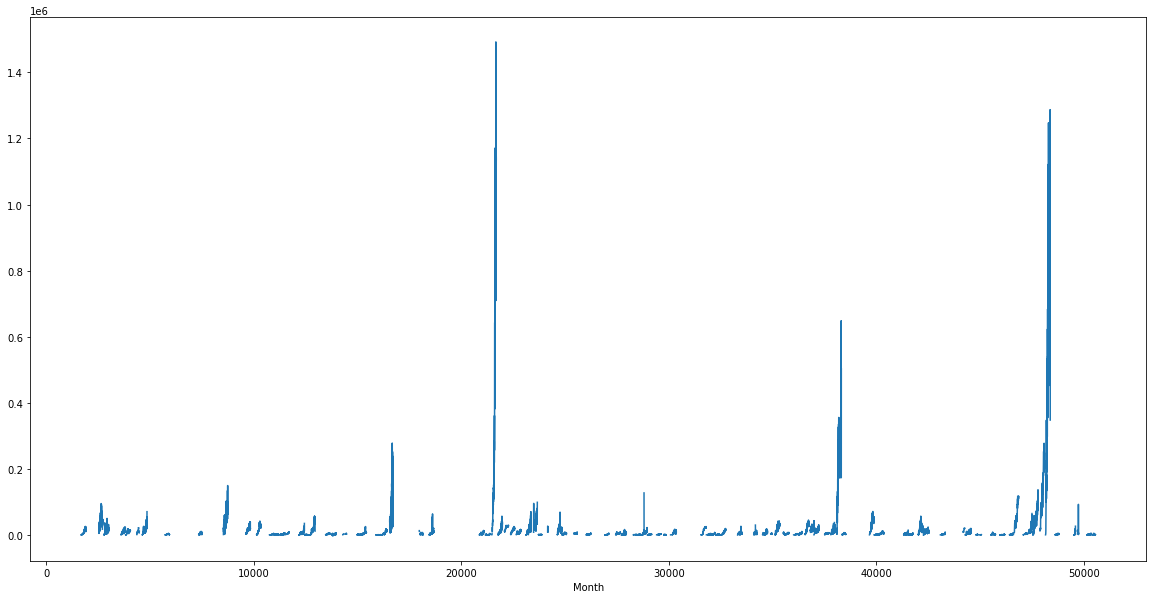

In [10]:
ndf.new_tests.plot(figsize=(20,10))
plt.xlabel("Month")

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Asia'),
  Text(1, 0, 'Europe'),
  Text(2, 0, 'Africa'),
  Text(3, 0, 'North America'),
  Text(4, 0, 'South America'),
  Text(5, 0, 'Oceania')])

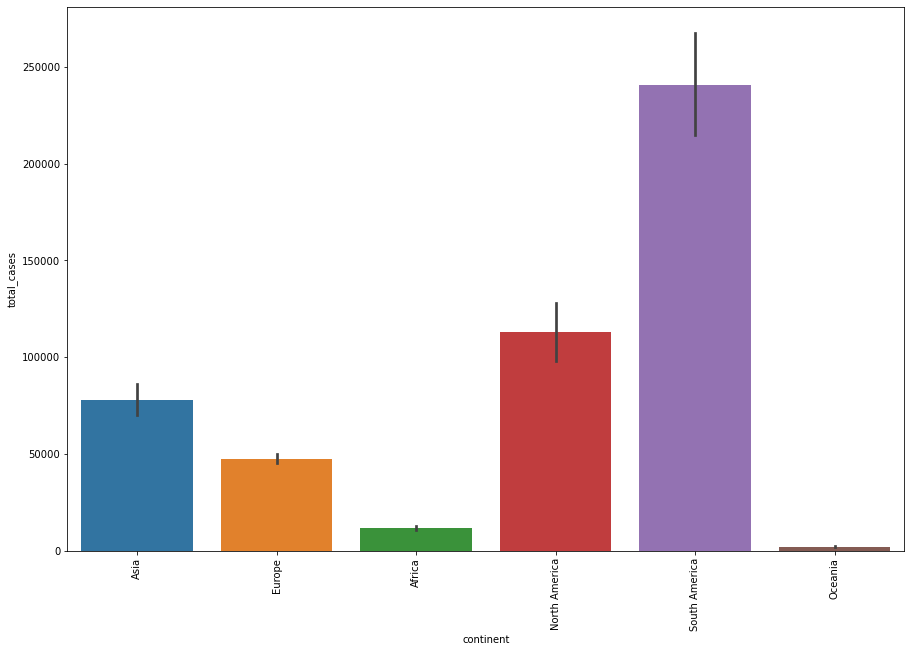

In [11]:
plt.figure(figsize = (15,10))
sns.barplot("continent", "total_cases", data=ndf)
plt.xticks(rotation=90)

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Asia'),
  Text(1, 0, 'Europe'),
  Text(2, 0, 'Africa'),
  Text(3, 0, 'North America'),
  Text(4, 0, 'South America'),
  Text(5, 0, 'Oceania')])

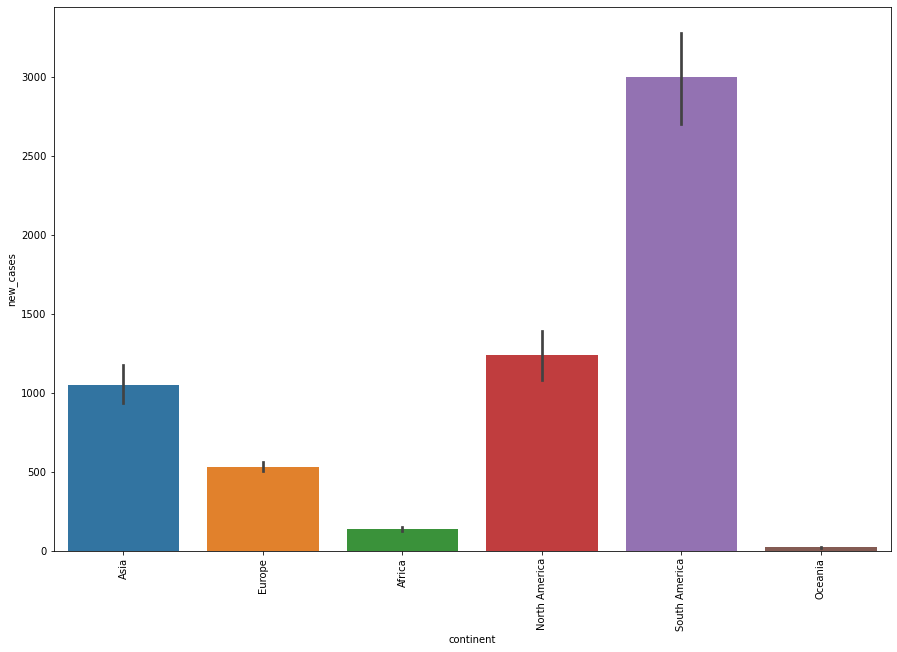

In [12]:
plt.figure(figsize = (15,10))
sns.barplot("continent", "new_cases", data=ndf)
plt.xticks(rotation=90)

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Asia'),
  Text(1, 0, 'Europe'),
  Text(2, 0, 'Africa'),
  Text(3, 0, 'North America'),
  Text(4, 0, 'South America'),
  Text(5, 0, 'Oceania')])

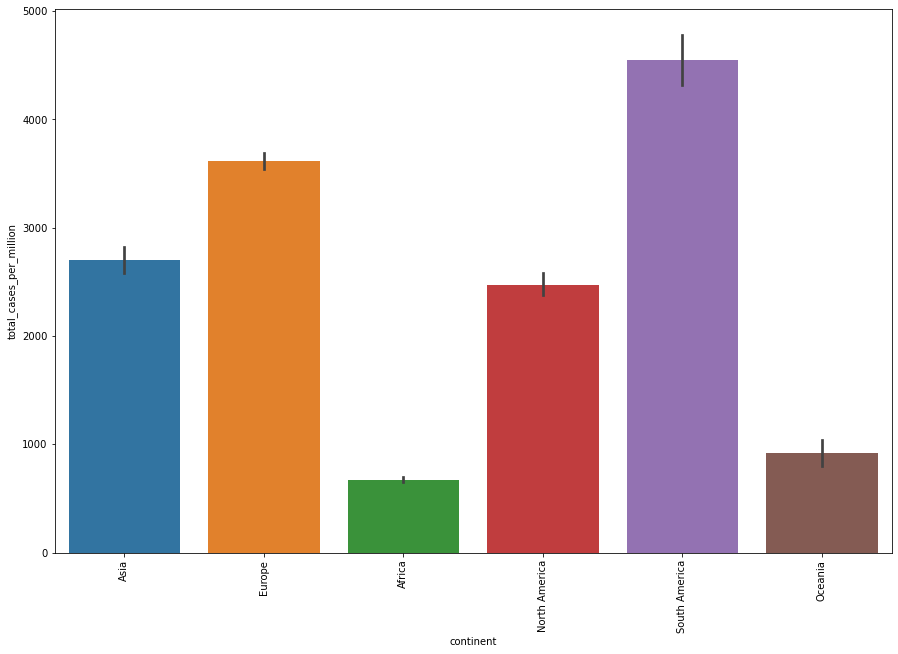

In [13]:
plt.figure(figsize = (15,10))
sns.barplot("continent", "total_cases_per_million", data=df)
plt.xticks(rotation=90)

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Asia'),
  Text(1, 0, 'Europe'),
  Text(2, 0, 'Africa'),
  Text(3, 0, 'North America'),
  Text(4, 0, 'South America'),
  Text(5, 0, 'Oceania')])

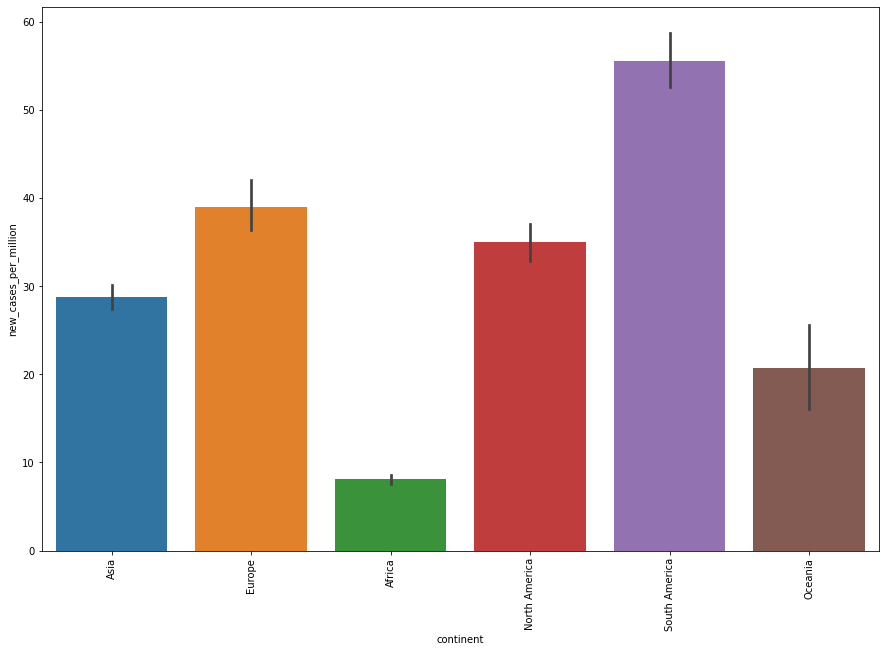

In [14]:
plt.figure(figsize = (15,10))
sns.barplot("continent", "new_cases_per_million", data=df)
plt.xticks(rotation=90)

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Asia'),
  Text(1, 0, 'Europe'),
  Text(2, 0, 'Africa'),
  Text(3, 0, 'North America'),
  Text(4, 0, 'South America'),
  Text(5, 0, 'Oceania')])

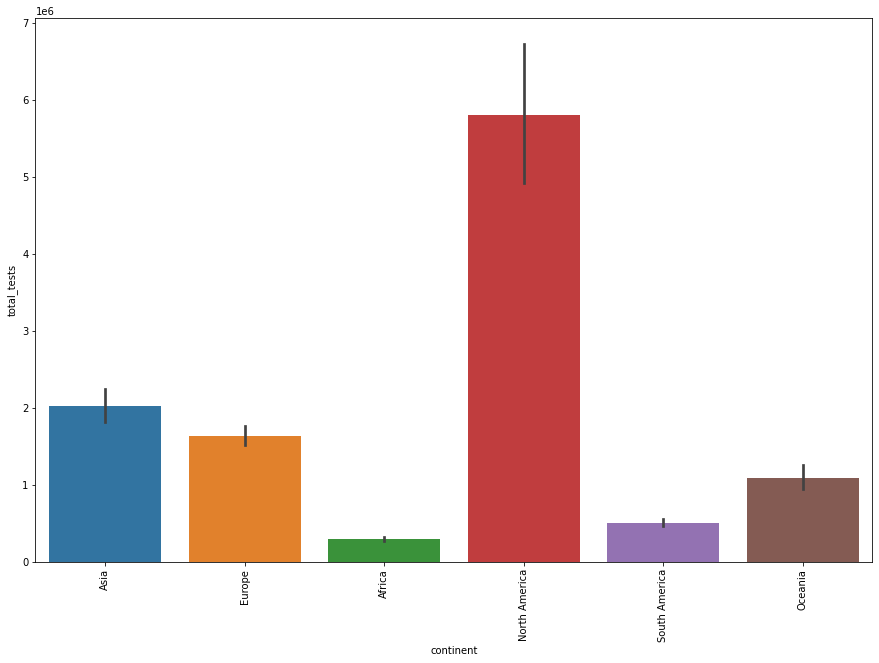

In [15]:
plt.figure(figsize = (15,10))
sns.barplot("continent", "total_tests", data=ndf)
plt.xticks(rotation=90)